In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from imblearn.combine import SMOTETomek
from wordcloud import WordCloud
import joblib

# Read the CSV file using a relative path
data = pd.read_csv('../Data Cleaning/CleanedData.csv')
data.head()

,Country,Place,Details,Class,WordCountBeforeCleaning
0,Africa,Signal Hill,signal hill side table mountain named firing c...,None Related,168
1,Africa,Alexandria Library,futuristic building reading place seat reader ...,None Related,147
2,Africa,Pompey's Pillar,pompeii column tower ruin temple serapeum requ...,None Related,193
3,Africa,Nairobi National Park,nairobi national park kilometer south nairobi ...,None Related,53
4,Africa,Giraffe Centre,giraffe center home endangered rothschild gira...,None Related,193


In [2]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the test data to a CSV file
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [3]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Details'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['Details'])

In [4]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get total number of features
total_features = len(feature_names)

# Print or use the feature names and total number of features as needed
print("Feature Names:", feature_names[:20])  
print("Total Number of Features:", total_features)

Feature Names: ['abandoned' 'abbey' 'abbot' 'abbott' 'abc' 'abdicated' 'abdul' 'abide'
 'ability' 'able' 'aboard' 'aboriginal' 'aborigine' 'abounds' 'abril'
 'abroad' 'abseiling' 'absolutely' 'absorb' 'abundance']
Total Number of Features: 7298


In [5]:
# Handling imbalance class / data
smt = SMOTETomek(random_state=42)
X_res, Y_res = smt.fit_resample(X_train_tfidf, train_data['Class']) 
# X_res, Y_res = X_train_tfidf, train_data['Class']
print(Y_res.value_counts())

Class
Robotic          392
None Related     392
Aerospace        392
Biotechnology    392
Name: count, dtype: int64


In [6]:
# Create and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_res, Y_res)

MultinomialNB()

In [7]:
# Model Evaluation
# Make Predictions on the test set
predictions = naive_bayes_classifier.predict(X_test_tfidf)

In [8]:
# Evaluate the classifier
accuracy = accuracy_score(test_data['Class'], predictions)
precision = precision_score(test_data['Class'], predictions, average='weighted')
recall = recall_score(test_data['Class'], predictions, average='weighted')
f1 = f1_score(test_data['Class'], predictions, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99


In [9]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(test_data['Class'], predictions)
classification_rep = classification_report(test_data['Class'], predictions)

print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Confusion Matrix:
[[ 10   1   0   1]
 [  0  17   0   0]
 [  0   0 105   0]
 [  0   0   0  16]]

Classification Report:
               precision    recall  f1-score   support

    Aerospace       1.00      0.83      0.91        12
Biotechnology       0.94      1.00      0.97        17
 None Related       1.00      1.00      1.00       105
      Robotic       0.94      1.00      0.97        16

     accuracy                           0.99       150
    macro avg       0.97      0.96      0.96       150
 weighted avg       0.99      0.99      0.99       150



In [10]:
# Save the train model to a file
joblib.dump(naive_bayes_classifier, 'model.h5')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

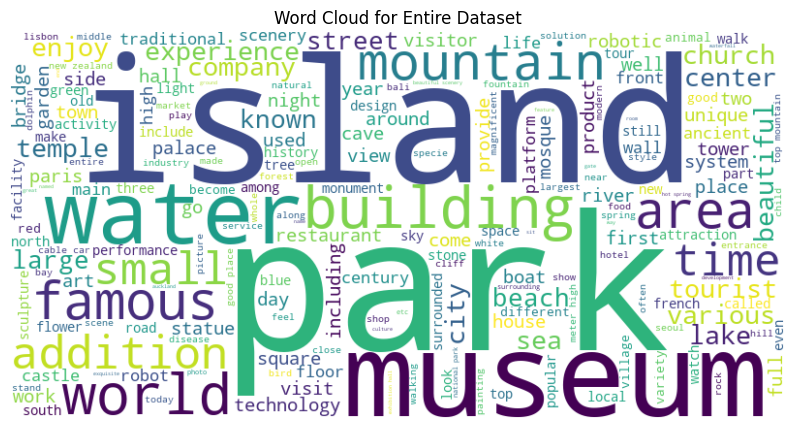

In [11]:
# Generate Word Cloud for the entire dataset
all_text = ' '.join(data['Details'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Entire Dataset')
plt.savefig('Word_Cloud_Dataset.png')
plt.show()

In [12]:
# # Experiment with different values for max_features
# max_features_values = [50, 100, 200,250,300,350,400,450,500,750]

# for max_features in max_features_values:
#     tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
#     X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Details'])
#     X_test_tfidf = tfidf_vectorizer.transform(test_data['Details'])

#     # Handling imbalance class / data
#     smt = SMOTETomek(random_state=42)
#     X_res, Y_res = smt.fit_resample(X_train_tfidf, train_data['Class'])

#     # Create and train a Naive Bayes classifier
#     naive_bayes_classifier = MultinomialNB()
#     naive_bayes_classifier.fit(X_res, Y_res)

#     # Evaluate the classifier
#     predictions = naive_bayes_classifier.predict(X_test_tfidf)
#     accuracy = accuracy_score(test_data['Class'], predictions)

#     print(f'max_features={max_features}, Accuracy: {accuracy:.2f}')


In [13]:
# Example code assuming tfidf_vectorizer is already trained
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the first 10 features
print("First 10 features:", feature_names[:10])

# Display all features
print("All features:", feature_names)


First 10 features: ['abandoned' 'abbey' 'abbot' 'abbott' 'abc' 'abdicated' 'abdul' 'abide'
 'ability' 'able']
All features: ['abandoned' 'abbey' 'abbot' ... 'zone' 'zoo' 'zoom']


Class List: ['Robotic' 'None Related' 'Aerospace' 'Biotechnology']


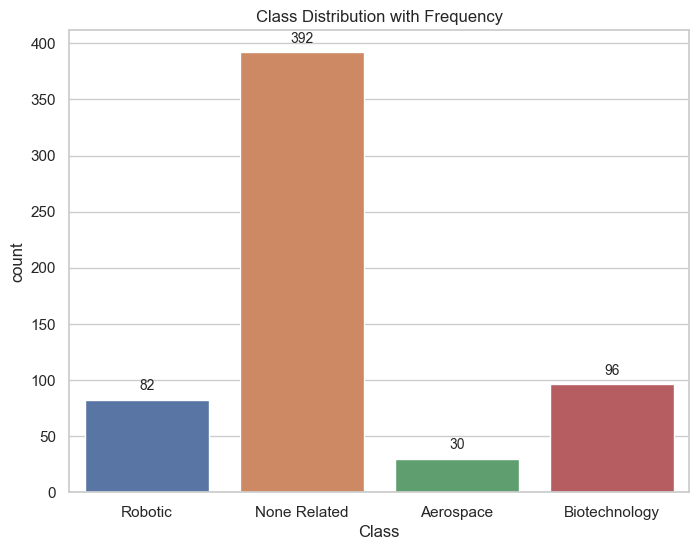

In [14]:
# Assuming train_data is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create the count plot
ax = sns.countplot(x='Class', data=train_data, hue='Class')

# Add frequency labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Get unique class values
class_list = train_data['Class'].unique()

# Print class list to console
print("Class List:", class_list)

plt.title('Class Distribution with Frequency')
plt.show()

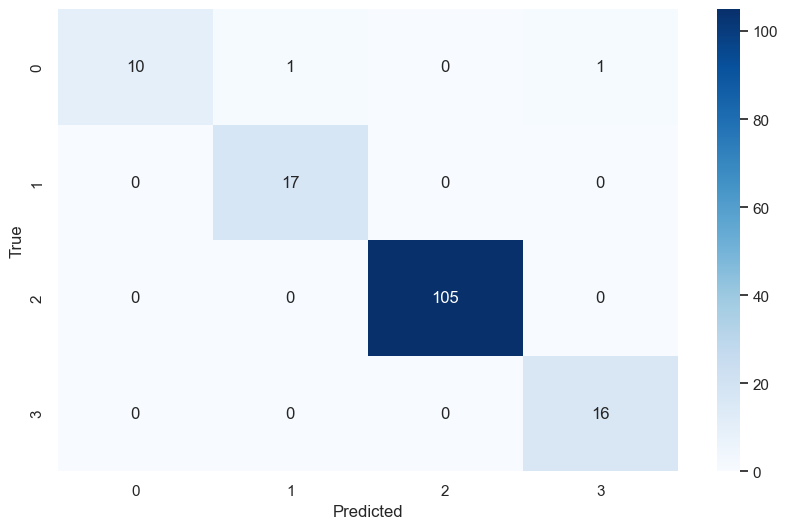

In [15]:
# Calculate the confusion matrix
cm = confusion_matrix(test_data['Class'], predictions)

# Set a larger figure size
plt.figure(figsize=(10, 6))

# Display the confusion matrix with class names
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels for the axes
plt.xlabel('Predicted')
plt.ylabel('True')

# Save the plot as an image (PNG format)
plt.savefig('confusion_matrix.png')

# Display the plot
plt.show()

In [16]:
# Load the saved model and vectorizer
loaded_naive_bayes_classifier = joblib.load('model.h5')
loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Print information about the loaded model and vectorizer
print("Loaded Naive Bayes Classifier:", loaded_naive_bayes_classifier)
print("Loaded TF-IDF Vectorizer:", loaded_tfidf_vectorizer)

Loaded Naive Bayes Classifier: MultinomialNB()
Loaded TF-IDF Vectorizer: TfidfVectorizer()


In [17]:
def class_det(Details, vectorizer, classifier):
    input_data = [Details]
    vectorized_input_data = vectorizer.transform(input_data)
    predictions = classifier.predict(vectorized_input_data)
    print(predictions)
    return predictions

In [18]:
queries = [
    'Astra makes engines for spacecraft using electric propulsion technology and provides launch services for space missions. Astra reached a key milestone in 2021, succeeding in its first commercial launch to low Earth orbit. The company says its launch systems are designed to be cost efficient with a payload capacity of approximately 600 kg',
    "Sinopharm is known for developing two inactivated virus COVID-19 vaccines. One of them is the Sinopharm BIBP COVID-19 vaccine, also known as BBIBP-CorV2. This vaccine completed Phase III trials in several countries with over 60,000 participants. It’s one of the vaccines being used in vaccination campaigns by certain countries in Asia, Africa, South America, and Europe",
    "Magic Leap, Inc. is an American technology company that released a head-mounted augmented reality display, called Magic Leap One, which superimposes 3D computer-generated imagery over real world objects. It is attempting to construct a light-field chip using silicon photonics.",
    "The rockets are very versatile. They can reach up to 10000 lbs of thrust and reach velocities to escape Earth's orbit. They will be essential in reaching the moon.",
]

for query in queries:
    print(query, class_det(query, tfidf_vectorizer, naive_bayes_classifier))
    print()

['Aerospace']
Astra makes engines for spacecraft using electric propulsion technology and provides launch services for space missions. Astra reached a key milestone in 2021, succeeding in its first commercial launch to low Earth orbit. The company says its launch systems are designed to be cost efficient with a payload capacity of approximately 600 kg ['Aerospace']

['Biotechnology']
Sinopharm is known for developing two inactivated virus COVID-19 vaccines. One of them is the Sinopharm BIBP COVID-19 vaccine, also known as BBIBP-CorV2. This vaccine completed Phase III trials in several countries with over 60,000 participants. It’s one of the vaccines being used in vaccination campaigns by certain countries in Asia, Africa, South America, and Europe ['Biotechnology']

['Biotechnology']
Magic Leap, Inc. is an American technology company that released a head-mounted augmented reality display, called Magic Leap One, which superimposes 3D computer-generated imagery over real world objects. I